# Exploration Data Analysis

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
# Import the data
recipes = pd.read_csv("../data/RAW_recipes.csv")
interactions = pd.read_csv("../data/RAW_interactions.csv")

In [11]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
nb_contrib_users = interactions[["user_id"]].groupby(by="user_id").value_counts().sort_values(ascending=False)
nb_contrib_users.head(20)

user_id
424680     7671
37449      5603
383346     4628
169430     4076
128473     3917
89831      3353
58104      3288
133174     3107
199848     3018
305531     2902
226863     2874
4470       2739
498271     2644
369715     2610
1072593    2350
176615     2338
95743      2311
286566     2283
39835      2260
107583     2252
Name: count, dtype: int64

In [8]:
nb_contrib_users.value_counts()
recipes[recipes['contributor_id'] == 424680]
interactions[interactions['user_id'] == 424680]

,user_id,recipe_id,date,rating,review
149,424680,256416,2009-11-02,5,Made this with raw apple cider & my last bag o...
351,424680,408997,2011-10-18,5,Used Gala apples for these muffins & I was ver...
440,424680,426090,2010-05-29,5,Really enjoyed working with the mustard seeds ...
587,424680,175614,2008-06-09,5,"I cut back on the amount of red pepper, but ot..."
597,424680,383271,2009-08-31,5,Don't know if I changed the taste or texture o...
...,...,...,...,...,...
1131984,424680,289382,2008-05-02,5,I used cheese tortellini in this recipe & redu...
1132110,424680,116551,2011-08-07,5,"When it comes to smoothies, I don't usually li..."
1132175,424680,441819,2011-01-24,5,I was a little hesitant about making a recipe ...
1132319,424680,190261,2010-05-13,5,What a great way to dress up the ol' carrot! D...


In [32]:
import ast

ingredients = recipes['ingredients'].apply(ast.literal_eval)
ingredients = pd.unique(ingredients.explode())
# ingredients_count = ingredients.value_counts()
ingredients2 = "ingredient " + ingredients.astype(str)


In [34]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
sentences = ingredients2.tolist()

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences)
print(embeddings.shape)

# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)

(14942, 384)


In [38]:
embeddings = pd.DataFrame(embeddings)
embeddings.set_index(ingredients)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
winter squash,0.008272,0.051587,-0.053544,0.106584,0.098192,0.059711,-0.033338,-0.003537,-0.012661,-0.084763,...,-0.008084,-0.002528,0.083534,-0.092461,0.028158,-0.011921,-0.069205,-0.095178,0.079749,0.064949
mexican seasoning,-0.060274,-0.025824,0.013632,0.083497,0.047260,0.024575,0.028870,-0.013357,-0.042021,-0.075286,...,-0.000251,0.043146,0.068277,-0.017732,0.029087,-0.057675,-0.049585,0.018144,0.081257,0.012525
mixed spice,-0.051213,-0.029254,-0.005718,0.067683,0.016142,0.039896,0.028629,0.010146,0.013195,-0.116242,...,-0.016208,-0.045525,0.027233,-0.026670,-0.018859,-0.078792,-0.014998,-0.059805,0.002540,0.050897
honey,-0.036253,-0.004840,0.043838,0.023962,0.027204,0.076160,0.049637,0.005674,-0.008427,-0.016312,...,-0.018233,-0.048475,0.016749,-0.064713,0.071492,-0.028649,0.043433,-0.047275,0.033028,-0.034324
butter,-0.016715,-0.053317,0.018982,0.057962,0.020778,0.018976,0.056396,-0.023656,-0.049053,-0.120635,...,0.026267,-0.041772,0.011273,-0.048272,0.082633,0.014902,0.025750,-0.028612,0.125319,0.054630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
apricot jell-o,-0.065566,0.007995,0.007503,0.056864,0.060530,0.005413,0.121993,0.032336,0.055462,-0.072075,...,-0.002713,-0.001665,0.057143,-0.005628,0.024865,-0.009170,-0.003866,0.019703,0.145298,-0.008634
rosarita premium whole black beans,-0.021372,-0.011465,-0.083679,0.079744,0.061905,0.065114,0.010479,0.055206,0.018305,-0.055389,...,-0.051325,-0.077617,0.067075,0.009550,-0.011649,-0.005795,0.007821,-0.051330,0.010712,-0.019155
hunt's fire roasted diced tomatoes,-0.040852,-0.010329,-0.057103,0.060759,0.042479,-0.012113,0.056746,-0.062430,-0.008067,-0.012763,...,0.086081,0.007296,0.074345,-0.063677,0.029335,0.074382,0.019952,0.019594,0.117101,0.007433
skinless halibut fillet,-0.042504,0.078283,-0.027120,0.045596,0.002067,-0.003748,0.107779,0.067170,-0.007164,-0.065246,...,-0.019242,0.085963,0.042706,-0.072976,0.017520,0.030660,-0.057797,-0.077492,0.083857,0.104711


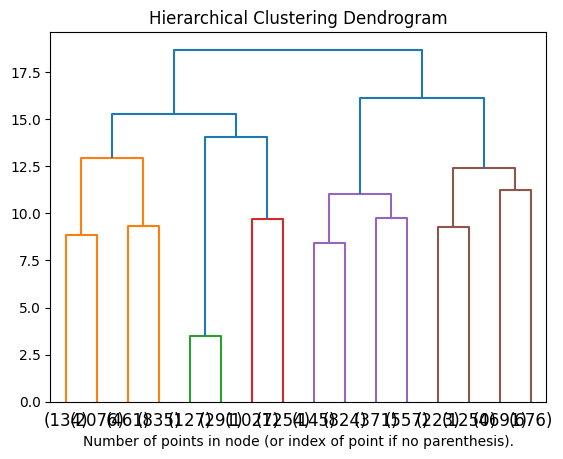

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(embeddings)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

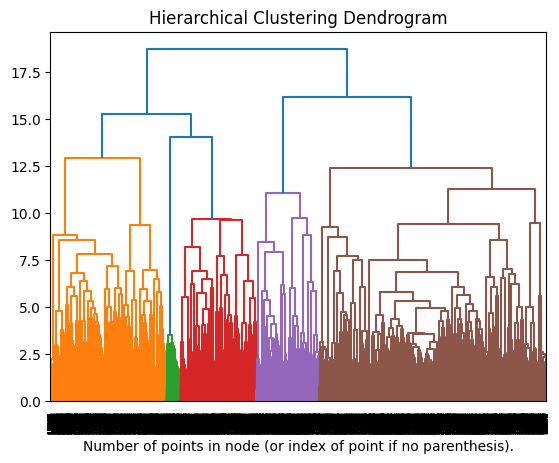

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [44]:
model.labels_
ingredients_df = pd.DataFrame(ingredients)
ingredients_df['labels'] = model.labels_

In [45]:
from sklearn.decomposition import PCA

pca_ingredients = PCA(n_components=2)
pca_ingredients.fit(embeddings)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [46]:
print(pca_ingredients.explained_variance_ratio_)

[0.04242057 0.03627656]


In [62]:
ward = pd.DataFrame(data = model.children_)
ward['distance'] = model.distances_
ward = pd.merge(ward, ingredients_df, how='left', left_on=0, right_index=True)
ward = pd.merge(ward, ingredients_df, how="left", left_on=1, right_index=True)

In [ ]:
model_cut = AgglomerativeClustering(distance_threshold=0.8, n_clusters=None)
model_cut = model_cut.fit(embeddings)
print(model_cut.n_clusters_)

array([3002,  125,  273, ..., 2776, 1517, 3651], shape=(14942,))

In [67]:
ingredients_df.rename(columns={"labels" : "full dendro leave"})

,0,full dendro leave
0,winter squash,9637
1,mexican seasoning,13869
2,mixed spice,9629
3,honey,12228
4,butter,10999
...,...,...
14937,apricot jell-o,8
14938,rosarita premium whole black beans,3
14939,hunt's fire roasted diced tomatoes,2
14940,skinless halibut fillet,1


In [68]:
ingredients_df['clusters'] = model_cut.labels_